<a href="https://colab.research.google.com/github/roykingshuk/detect-abusive-comment/blob/main/test/loaded_baselines__19_11_kingshuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries and Github Repository

In [16]:
# Uncomment the below code if the notebook is run on Google Colab.
!git clone https://github.com/abirmondal/detect-abusive-comment.git

Cloning into 'detect-abusive-comment'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 212 (delta 48), reused 63 (delta 18), pack-reused 97
Receiving objects: 100% (212/212), 72.69 MiB | 30.55 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [17]:
utils_folder_path = '/content/detect-abusive-comment/src/utils'

import os
from sklearn.feature_extraction.text import TfidfVectorizer
os.chdir(utils_folder_path)

import pickle as pkl
import bz2
import _pickle as cPickle
import model_report as mr
import dataset as ds

# Loading Training and Testing Dataset

In [18]:
df_train, df_test = ds.get_full_dataset(val=False)
X_train, X_test = df_train['text'].to_list(), df_test['text'].to_list()
Y_train, Y_test = df_train['hate'].values, df_test['hate'].values

ds.get_dataset_details()
print('\nTesting Set Dataset Structure :-')
ds.get_test_set()

Dataset Details:-
  Dataset Name: m_dataset_21_9
   Total Count: 90345
     Train Set: 63241 ( 70.0% )
      Test Set: 18069 ( 20.0% )
Validation Set:  9035 ( 10.0% )

Testing Set Dataset Structure :-


,text,hate
0,বাঙালি জীবনেও আগাইতে পারবে না এই ধরনের শো বাইর...,0
1,বাহ চমেৎকার সিলেট খুলনাকে হারাই দিলো,0
2,এই সালা কে গুলি করে মারা উচিত,1
3,ধুর তোর খেলার মাইরে বাপ আর খেলাই দেখবো না,0
4,ভচ মিথ্যা বলেন কেনো আপনি তো গাঁজা খাইছেন,1
...,...,...
18064,আল্লাহ এই যুগের মেয়েরা কি এখনো এত বোকা আছে না...,0
18065,অপেক্ষায় আছে বাংলাদেশের কোটি মানুষ কবে শুনতে ...,0
18066,হুই হাই হুই হাই করার সময় ভাবি এত্তগুলি বান্দর...,0
18067,সব মাদার চুদরা দারিয়ে দেকলো,1


# TF-IDF Vectorization

In [19]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# **Loading Pre-Trained Model**

---



1.   Support Vector Machine (svm)
2.   Logistic Regression (lr)
3.   Naive Bayes (mnb)
4.   Random Forest (rf)



In [32]:
# To change the pre-trained model just change the model type to (svm/lr/mnb) present in the model_path just before the file extension
model_path = '/content/detect-abusive-comment/src/models/toxic-comments-mnb.pkl'
loaded_model = pkl.load(open(model_path, 'rb'))

# Uncomment this code to  set the path and load the PBZ2 File for Random Forest
# model_path = '/content/detect-abusive-comment/src/models/toxic-comments-rf.pbz2'
# loaded_model = cPickle.load(bz2.BZ2File(model_path, 'rb'))

    Accuracy Score:  0.716420388510709
Weighted Precision:  0.7486777668952008
   Weighted Recall:  0.4987602766540519
          F1-Score:  0.5986842105263158

Classification Report :-
               precision    recall  f1-score   support

           0       0.70      0.88      0.78     10406
           1       0.75      0.50      0.60      7663

    accuracy                           0.72     18069
   macro avg       0.73      0.69      0.69     18069
weighted avg       0.72      0.72      0.70     18069



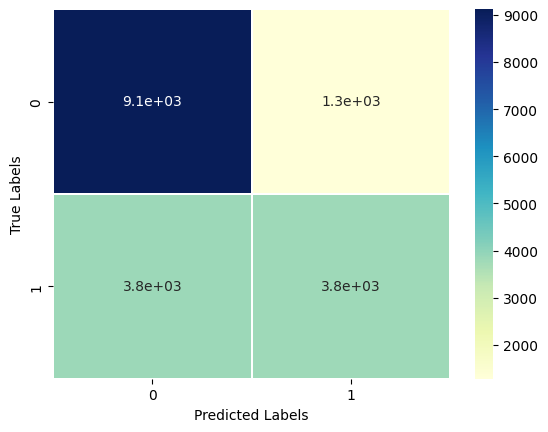

In [33]:
y_pred = loaded_model.predict(X_test_tfidf)
mr.confusion_mat(Y_test, y_pred)
mr.model_eval(Y_test, y_pred)